In [3]:
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
import numpy as np

conn = None
try:
    conn = sqlite3.connect("../postcovid.db")
    print(sqlite3.version)
except Error as e:
    print(e)




2.6.0


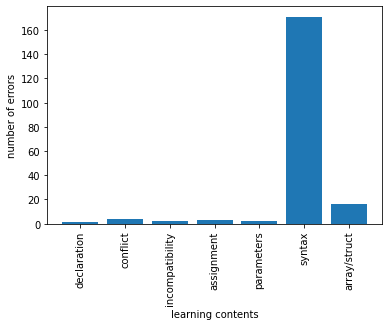

In [2]:
cur = conn.cursor()
cur.execute('select error_topics.class_name, count(*)   from error_class,  error_topics where  error_class.class=error_topics.id group by error_class.class ')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
       #if row[0]!="syntax":
            labels.append(row[0])
            values.append(row[1])
# plt.pie(values, labels=labels, labeldistance=None)
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("learning contents")
plt.ylabel("number of errors")
plt.savefig("../images/error_class.png",dpi=300, bbox_inches = "tight")

# plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

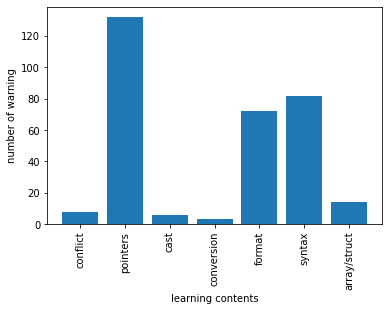

In [3]:
cur.execute('select warning_topics.class_name, count(*) from warning_class,  warning_topics where  warning_class.class=warning_topics.id group by warning_class.class ')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
       #if row[0]!="syntax":
            labels.append(row[0])
            values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("learning contents")
plt.ylabel("number of warning")
plt.savefig("../images/warning_class.png",dpi=300, bbox_inches = "tight")

plt.show()

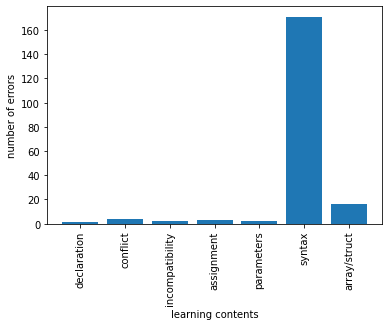

In [4]:
cur = conn.cursor()
cur.execute('select error_topics.class_name, count(*)   from last_errors_class,  error_topics where  last_errors_class.class=error_topics.id group by last_errors_class.class ')
rows = cur.fetchall()
labels = []
values = []

for row in rows:
        #if row[0]!="syntax":
            labels.append(row[0])
            values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("learning contents")
plt.ylabel("number of errors")
plt.savefig("../images/last_error_class.png",dpi=300, bbox_inches = "tight")
plt.show()

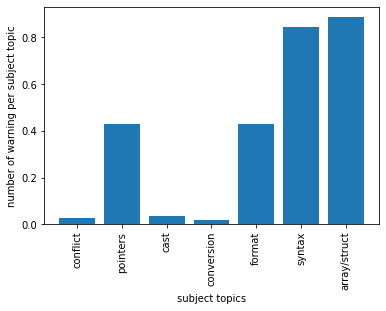

In [12]:
cur.execute('select warning_topics.class_name, count(*) from last_warning_class,  warning_topics where  last_warning_class.class=warning_topics.id group by last_warning_class.class ')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
       labels.append(row[0])
       values.append(row[1])
for i in range(len(values)):
    values[i] = values[i]/sum(values)

plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("subject topics")
plt.ylabel("number of warning per subject topic")
plt.savefig("../images/last_warningclass.png",dpi=300, bbox_inches = "tight")

plt.show()

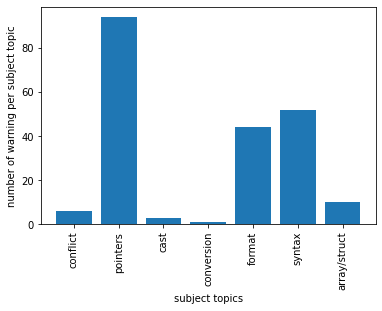

In [6]:

cur.execute('select warning_topics.class_name, count(*) '
            'from last_okwarning_class,  warning_topics '
            'where  last_okwarning_class.class=warning_topics.id '
            'group by last_okwarning_class.class ')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
        labels.append(row[0])
        values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("subject topics")
plt.ylabel("number of warning per subject topic")
plt.savefig("../images/last_okwarning_class.png",dpi=300, bbox_inches = "tight")

plt.show()

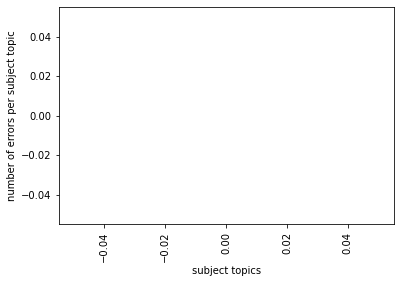

In [7]:
cur = conn.cursor()
cur.execute('select error_topics.class_name, count(*)   '
            'from last_croudy_errors_class,  error_topics '
            'where last_croudy_errors_class.class=error_topics.id '
            'group by last_croudy_errors_class.class')
rows = cur.fetchall()

labels = []
values = []

for row in rows:
       if row[0]!="syntax":
            labels.append(row[0])
            values.append(row[1])
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.xlabel("subject topics")
plt.ylabel("number of errors per subject topic")
plt.savefig("../images/last_croudy_class.png",dpi=300, bbox_inches = "tight")

plt.show()

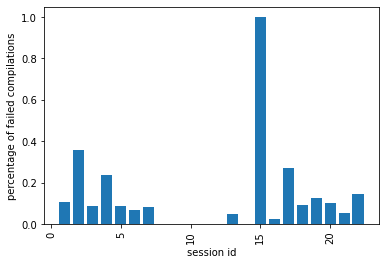

In [8]:
cur = conn.cursor()
cur.execute('select exams.session, count(*) '
            'from last_compilation,exams '
            'where last_compilation.exam=exams.id '
            'group by exams.session order by exams.session')

rows = cur.fetchall()

results = {}

for row in rows:
       results[row[0]] = row[1]

cur.execute('select exams.session, count(*) '
            'from last_compilation,exams '
            'where success=0 and last_compilation.exam=exams.id '
            'group by exams.session order by exams.session')
rows2 = cur.fetchall()


for row in rows2:
       results[row[0]] = row[1]/results[row[0]]
for key in results.keys():
    if results[key] >1:
        results[key] = 0
plt.bar(results.keys(),results.values())
plt.xticks(rotation=90)
plt.xlabel("session id")
plt.ylabel("percentage of failed compilations")
plt.savefig("../images/last_failed_comp_class.png",dpi=300, bbox_inches = "tight")

plt.show()


In [9]:
cur = conn.cursor()
cur.execute('select error_topics.class_name  from error_topics')
rows = cur.fetchall()

labels = []

for row in rows:
    if row[0] is not None:
        labels.append(row[0])

cur = conn.cursor()
cur.execute('select error_topics.class_name, count(*), last_croudy_errors_class.exam   '
            'from last_croudy_errors_class,  error_topics '
            'where last_croudy_errors_class.class=error_topics.id '
            'group by last_croudy_errors_class.exam,last_croudy_errors_class.class')
rows = cur.fetchall()



students ={}
for row in rows:
       if row[2] in students.keys():
           students[row[2]][row[0]] = row[1]
       else:
           students[row[2]]={}
           for label in labels:
               students[row[2]][label]=0
           students[row[2]][row[0]] = row[1]
line = " & "
for label in labels:
    line += label + " & "
print(line)
for key in students.keys():
    line = str(key)
    for label in labels:
        line += " &" + str(students[key][label])
    print(line)

 & declaration & conflict & incompatibility & assignment & initialization & parameters & syntax & array/struct & 
304 &0 &0 &0 &0 &0 &0 &1 &0


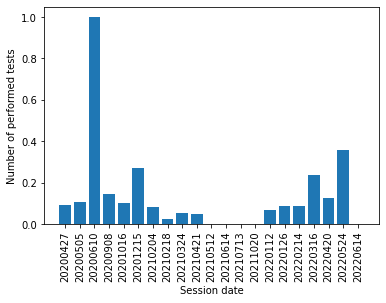

In [10]:
cur.execute('SELECT s.date, count(*) '
            'FROM last_compilation, exams, sessions s '
            'where s.id=exams.session and last_compilation.exam = exams.id  '
            'group by exams.session order by s.date')


rows = cur.fetchall()

values = {}

tot = 0
for row in rows:
      values[row[0]] = row[1]
cur.execute('SELECT s.date, count(*) '
            'FROM last_compilation , exams, sessions s '
            'where s.id = exams.session and  success= 0 and last_compilation.exam = exams.id'
            ' group by session order by session')
rows = cur.fetchall()


for row in rows:
       values[row[0]] = row[1]/values[row[0]]


plt.figure()
x= []
y= []
for key in values.keys():
    if values[key] > 1:
        values[key] = 0

plt.bar(values.keys(),values.values())
#plt.legend()
plt.xticks(rotation=90)
plt.ylabel("Number of performed tests")
plt.xlabel("Session date")
plt.savefig("../images/compile_err_per_session.png", dpi=300, bbox_inches = "tight")
plt.show()